In [250]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [251]:
df = pd.read_excel('review.xlsx')

In [252]:
df.head()

,Unnamed: 0,item,date,star,startext,review
0,0,스킨 셀 엘릭시르 크림,등록일 : 2022-10-31,★★★★★,아주만족,환절기에 사용하기 딱 좋네요~\n화장품 흡수 도와주는 다른 기기랑 같이 사용하고 있...
1,1,스킨 셀 엘릭시르 앰플 1세트,등록일 : 2022-10-31,★★★★★,아주만족,건조하고 힘 없는 피부에 잘 쓰고 있습니다.\n나이가 드니까 유분이 자꾸 빠져서 늘...
2,2,듀얼소닉 스킨 엘릭시르 마스크팩(5매입),등록일 : 2022-10-31,★★★★★,아주만족,직장을 옮기면서 마스크를 필수로 착용해야 하는 환경이 되다보니 피부가 완전 망가졌어...
3,3,촉촉탄력페이스 패키지 (크림 1개+헤어밴드...,등록일 : 2022-10-31,★★★★★,아주만족,크림제형이 되게 쫀쫀해요 그렇다고 끈적임이 심한건 전혀 아니고\n제형만큼 실제 피부...
4,4,"[렌탈]프로페셔널 세트 48개월/58,900원",등록일 : 2022-10-31,★★★★★,아주만족,친구가 추천해서 구매해보았는데\n완전 느낌좋아요\n비싼걸 구매했다고\n잔소리하던 신...


데이터 전처리

In [253]:
df.item.unique().tolist()

['스킨 셀 엘릭시르 크림',
 '스킨 셀 엘릭시르 앰플 1세트',
 '듀얼소닉 스킨 엘릭시르 마스크팩(5매입)',
 '촉촉탄력페이스 패키지 (크림 1개+헤어밴드...',
 '[렌탈]프로페셔널 세트 48개월/58,900원',
 '마스크팩 2주 보습 케어 20매',
 '블루밍 모이스처 젤 250mlx 3개',
 '[렌탈]럭셔리 세트 48개월/38,900원',
 '프로페셔널 세트 [사은품:앰플2+헤어밴드1]',
 '프로페셔널 2배샷 패키지',
 '스킨 셀 엘릭시르 토너',
 '엘릭시르 베이직 코스메틱 3종세트 (토너+...',
 '블루밍 모이스처 젤 250mlx 8개',
 '앰플 마스터 패키지 (앰플 4세트+마스크팩...',
 '엘릭시르 탄력관리 세트 (앰플+크림+마스크...',
 '블루밍 모이스처 젤 250ml',
 '[렌탈] 프로페셔널 바디 풀세트 48개월/68,...',
 '쫀득 페이스 더블 패키지 (앰플 2세트+마스...',
 '럭셔리 페이스 시크릿 세트',
 '프로페셔널 페이스 더블샷 패키지',
 '럭셔리 세트 [사은품:헤어밴드1]',
 '프로페셔널 페이스 시크릿 세트',
 '블루밍 모이스처 젤 250ml x 2개',
 '마스크팩 한달 보습 케어 40매',
 '더블 보습 패키지 (앰플 2세트+마스크팩 5...',
 '럭셔리 바디 풀세트 [사은품:블루밍젤3+헤...',
 '럭셔리 세트 2배샷 패키지',
 '프로페셔널 페이스 카트리지',
 '프로페셔널 아이 시크릿 세트',
 '럭셔리 페이스 카트리지',
 '듀얼소닉 스킨 엘릭시르 마스크팩(10매입)',
 '프로페셔널 바디 풀세트 [사은품:블루밍젤5...',
 '프로페셔널 바디 카트리지[사은품 : 젤 5개...',
 '[렌탈] 럭셔리 바디 풀세트 48개월/48,900...',
 '프로페셔널 올인원 패키지 (바디 카트리지1...',
 '프로페셔널 페이스 카트리지 2배샷 ( 총 :...',
 '럭셔리 바디 카트리지 (2만샷, 1샷 20도트)...',
 '프로페셔널 페이스&아이 세트 (프로페셔널...',
 '프로페셔

전체 아이템 개수

In [254]:
len(df)

4451

프로페셔널이 포함된 아이템 추출

In [255]:
df_pro = df[df['item'].str.contains('프로페셔널')]

In [256]:
len(df_pro)

4021

프로페셔널이 포함된 아이템은 4021개

등록일을 시계열 데이터로 만들기 위한 전처리 

등록일 : 2022-10-31 에서 공백 및 등록일 : 텍스트 제거 

In [257]:
df_pro['date'] = df_pro['date'].str.replace("등록일 : ", "")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22524\1896957077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro['date'] = df_pro['date'].str.replace("등록일 : ", "")


In [258]:
df_pro['date']

4       2022-10-31
7       2022-10-31
8       2022-10-31
11      2022-10-31
12      2022-10-31
           ...    
4446    2019-01-29
4447    2019-01-20
4448    2019-01-19
4449    2019-01-05
4450    2019-01-05
Name: date, Length: 4021, dtype: object

In [259]:
df_pro['date'] = pd.to_datetime(df_pro['date'], errors='ignore' , format="%Y-%m-%d")

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22524\1393728418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro['date'] = pd.to_datetime(df_pro['date'], errors='ignore' , format="%Y-%m-%d")


In [260]:
df_pro['date']

4       2022-10-31
7       2022-10-31
8       2022-10-31
11      2022-10-31
12      2022-10-31
           ...    
4446    2019-01-29
4447    2019-01-20
4448    2019-01-19
4449    2019-01-05
4450    2019-01-05
Name: date, Length: 4021, dtype: object

정규표현식으로 날짜 형식 1901-01-01 형식으로 변환되었는지 체크

In [261]:
import re

def chkeckError(datas):   
    #wow = re.search("M[a-z]+\.", datas)
    wow = re.match("[0-9]{4}-[0-9]{2}-[0-9]{2}", datas)
    
    if wow == None:
        return True
    
    return False

In [262]:
df_pro["dateCheck"]=df_pro["date"].map(chkeckError)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22524\3283850189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro["dateCheck"]=df_pro["date"].map(chkeckError)


In [263]:
df_pro["dateCheck"]

4       False
7       False
8       False
11      False
12      False
        ...  
4446    False
4447    False
4448    False
4449    False
4450    False
Name: dateCheck, Length: 4021, dtype: bool

날짜 형식이 아닌 date 확인하여 삭제 

In [264]:
df_pro[df_pro["dateCheck"]==True]

,Unnamed: 0,item,date,star,startext,review,dateCheck
3777,3777,프로페셔널 세트 [사은품:앰플2+헤어밴드1],조회수 : 17,★★★★,만족,[병원시술보단 집에서 편히 할 수 있는 홈케어로 구매했어요. 설명서대로 듀얼모드로 ...,True
3787,3787,프로페셔널 세트 [사은품:앰플2+헤어밴드1],조회수 : 17,★★★★,만족,[병원시술보단 집에서 편히 할 수 있는 홈케어로 구매했어요. 설명서대로 듀얼모드로 ...,True
3816,3816,프로페셔널 세트 [사은품:앰플2+헤어밴드1],조회수 : 7,★★★★★,아주만족,[집에서 관리받을수 있다는점이 우선 좋네요.\n한번 사용한결과 피부과에서 느끼는 자...,True
3818,3818,프로페셔널 세트 [사은품:앰플2+헤어밴드1],조회수 : 3,★★★★★,아주만족,[기계 사용하고 팩 한번했는데 다음날 뽀송한 느낌이에요]\n기계 사용하고 팩 한번했...,True
3826,3826,프로페셔널 세트 [사은품:앰플2+헤어밴드1],조회수 : 7,★★★★★,아주만족,[집에서 관리받을수 있다는점이 우선 좋네요.\n한번 사용한결과 피부과에서 느끼는 자...,True
3828,3828,프로페셔널 세트 [사은품:앰플2+헤어밴드1],조회수 : 3,★★★★★,아주만족,[기계 사용하고 팩 한번했는데 다음날 뽀송한 느낌이에요]\n기계 사용하고 팩 한번했...,True
3838,3838,프로페셔널 세트 [사은품:앰플2+헤어밴드1],조회수 : 0,★★★★★,아주만족,한번했는데도 확실히 효과과 있네여 병원 안가도 집에서 할수 있어서 너무 좋은데 쫌 ...,True
3848,3848,프로페셔널 세트 [사은품:앰플2+헤어밴드1],조회수 : 0,★★★★★,아주만족,한번했는데도 확실히 효과과 있네여 병원 안가도 집에서 할수 있어서 너무 좋은데 쫌 ...,True
3850,3850,프로페셔널 세트 [사은품:앰플2+헤어밴드1],조회수 : 1,★★,미흡,꾸준히 쓰면 좋아지겠죠?,True
3860,3860,프로페셔널 세트 [사은품:앰플2+헤어밴드1],조회수 : 6,★★★★★,아주만족,[피부가 약한 편이여서 피부 시술은 하게되면 다른 분들보다는 강도를 많이 약하게 하...,True


날짜 형식이 아닌 행 총 15개 있는 것을 확인

In [265]:
len(df_pro[df_pro["dateCheck"]==True])

15

날짜 형식이 아닌 아이템 삭제

In [266]:
df_pro = df_pro.drop(index = df_pro[df_pro["dateCheck"]==True].index)

date 열을 시간 포맷으로 변경함 

In [267]:
df_pro['date'] = pd.to_datetime(df_pro['date'], format="%Y-%m-%d")

In [268]:
df_pro['resample'] = df_pro['date'].dt.to_period(freq='Q')

<AxesSubplot:>

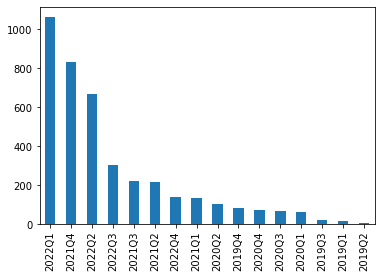

In [269]:
df_pro['resample'].value_counts().plot.bar()

위의 그래프를 보면 2022 1분기, 2021년 4분기에 리뷰가 많이 등록됨을 알 수 있다. 

In [270]:
#test.index = test.index.to_series().astype(str)

★전체 아이템에 대한 분석★

In [271]:
df_pro['star'].value_counts()

★★★★★    3471
★★★★      470
★★★        58
★★          6
★           1
Name: star, dtype: int64

1) 전체 평점 평균 

In [272]:
df_pro['point'] = df_pro['star'].replace({"★★★★★":5, "★★★★":4, "★★★":3, "★★":2, "★":1 } )

In [273]:
df_pro['point'].value_counts()

5    3471
4     470
3      58
2       6
1       1
Name: point, dtype: int64

In [274]:
df_pro['point'].mean()

4.848227658512232

=> 전체 평점 평균 : 4.85

plot chart 

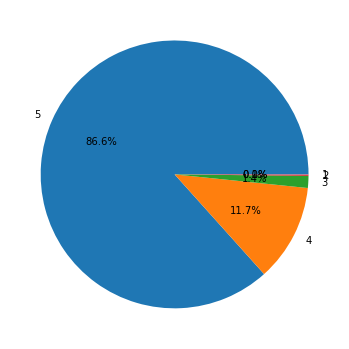

In [275]:
plt.figure(figsize=(6, 8))
plt.pie(df_pro['point'].value_counts(), labels =[5,4,3,2,1],  autopct='%.1f%%')
plt.show()

위의 그림을 보면 별점 5점이 약 86.6 % 임을 알 수 있다. 